<span style="color: #9370DB; font-size: 35px; display: block; text-align: center;">**Breast Cancer Prediction**</span>


![Breast Cancer Image](https://andytherd.com/wp-content/uploads/2020/10/ribbon-5641597_1920-e1603740448999-1536x990.png)


<a id="1"></a>
<h1 style='background:#d8bfd8; /* Pastel Purple */ 
            border:0; color:black;
            box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
            transform: rotateX(10deg);
            '><center style='color: white;'>Introduction</center></h1>


Breast cancer is the most prevalent cancer among women globally, constituting 25% of all cancer cases. In 2015, it affected over 2.1 million people. The disease initiates when cells in the breast undergo uncontrolled growth, often forming tumors that are detectable through X-rays or palpable as lumps.

**Challenges:**

The primary challenge lies in accurately classifying tumors as malignant (cancerous) or benign (non-cancerous). This project addresses this classification task using machine learning techniques, specifically Support Vector Machines (SVMs), applied to the Breast Cancer Wisconsin (Diagnostic) Dataset.

**Acknowledgements:**
This dataset has been sourced from UCI ML repository.
https://archive.ics.uci.edu/dataset/14/breast+cancer

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

<a id="1"></a>
<h1 style='background:#d8bfd8; /* Pastel Purple */ 
            border:0; color:black;
            box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
            transform: rotateX(10deg);
            '><center style='color: white;'>Data Overview</center></h1>

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis')


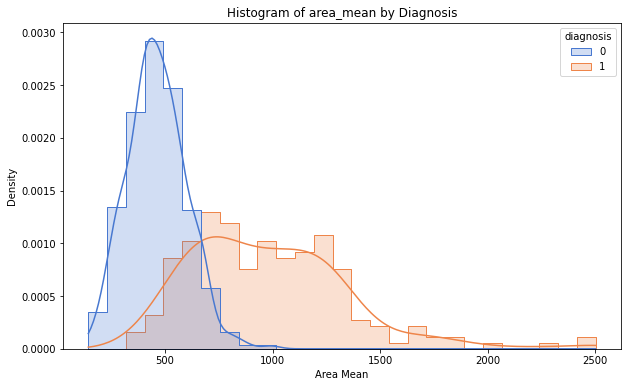

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='area_mean', hue='diagnosis', element="step", stat="density", common_norm=False, palette="muted", kde=True)

plt.title('Histogram of area_mean by Diagnosis')
plt.xlabel('Area Mean')
plt.ylabel('Density')

plt.show()

  
<a id="1"></a>
<h1 style='background:#d8bfd8; /* Pastel Purple */ 
            border:0; color:black;
            box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
            transform: rotateX(10deg);
            '><center style='color: white;'>Data Preprocessing</center></h1>

In [11]:
df.drop('id', axis=1, inplace=True) 

In [12]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
corr = df.corr()

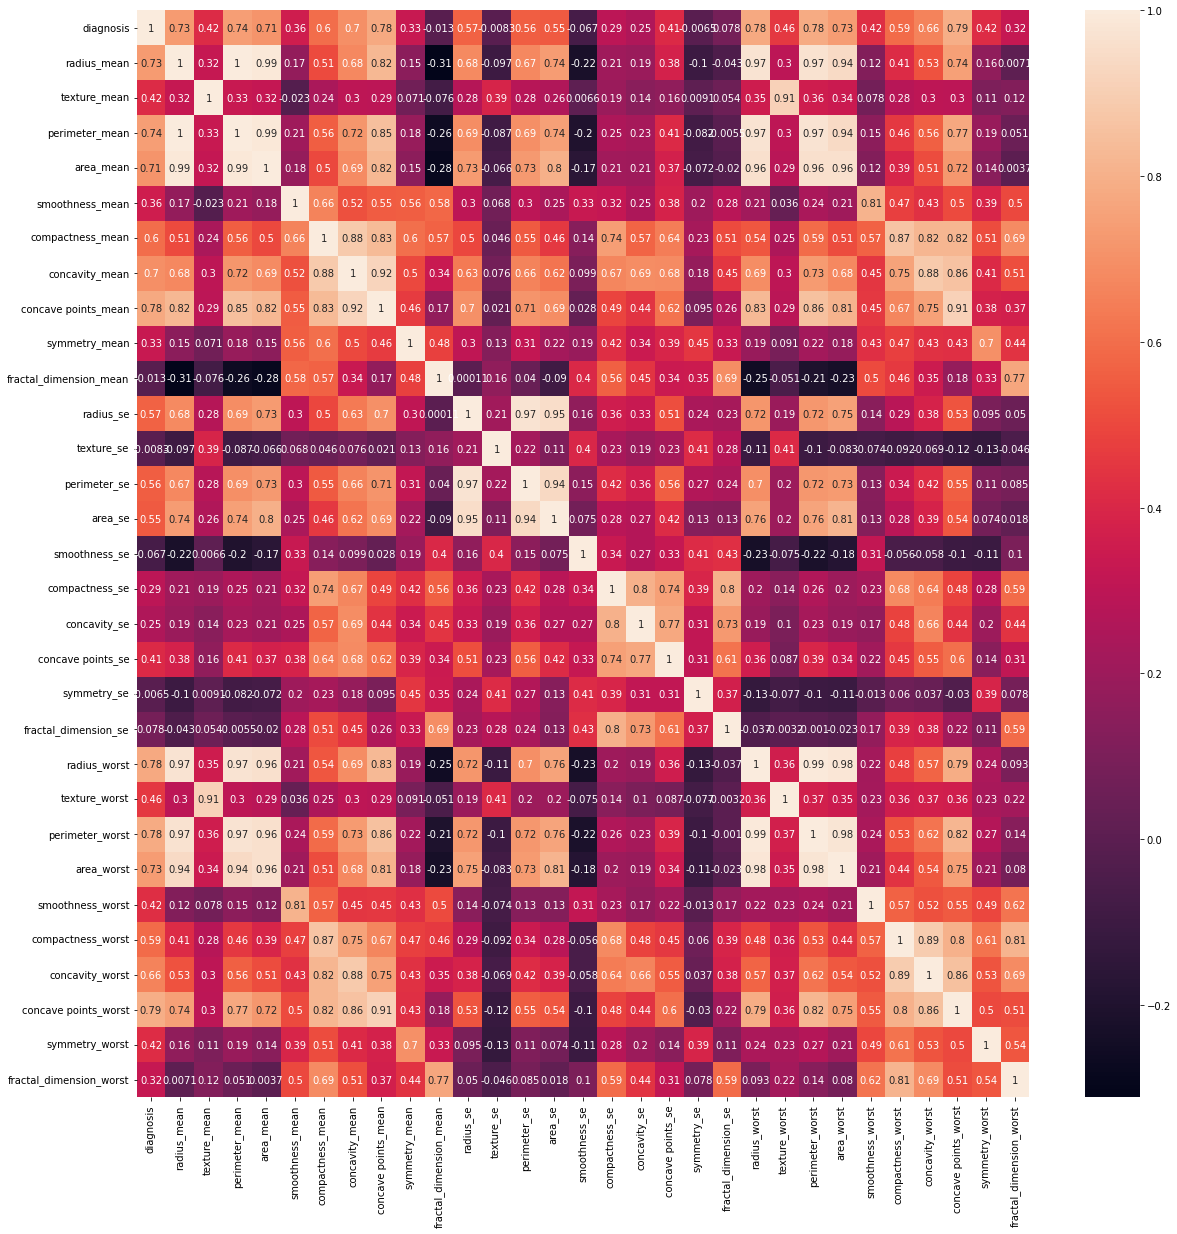

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

cor_target = abs(corr["diagnosis"])


relevant_features = cor_target[cor_target>0.2]

names = [index for index, value in relevant_features.iteritems()]

names.remove('diagnosis')


In [17]:
X = df[names]
y = df['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])


<a id="1"></a>
<h1 style='background:#d8bfd8; /* Pastel Purple */ 
            border:0; color:black;
            box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
            transform: rotateX(10deg);
            '><center style='color: white;'>Model Evaluation</center></h1>

<a id="1"></a>
<h1 style='background:white; /* Pastel Purple */ 
            border:0;
            '><center style='color: purple;'>Modelling</center></h1>

In [19]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train) 


    predictions = model.predict(X_test) 

    #metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

<a name="4-4"></a>
## Random Forest Classifer

In [27]:
rfc = RandomForestClassifier()

In [28]:
results = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)

In [29]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

In [30]:
results.sort_values(by='f1_score',ascending=False)

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
0,0.956140,0.941176,0.952381,0.930233,0.951032


<a name="4-5"></a>
## XGBoost

In [31]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

In [33]:
results.sort_values(by='f1_score',ascending=False)

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
0,0.956140,0.941176,0.952381,0.930233,0.951032


<a name="4-7"></a>
## Neural Network

In [34]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):
    
    if epoch < 50:
        return lr
    
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

inputs = Input(shape=X.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=140)
predictions = model.predict(X_test)



Epoch 1/140
15/15 [==============================] - 1s 2ms/step - loss: 0.7069 - accuracy: 0.4440
Epoch 2/140
15/15 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.5187
Epoch 3/140
15/15 [==============================] - 0s 2ms/step - loss: 0.6234 - accuracy: 0.6681
Epoch 4/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7099
Epoch 5/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7912
Epoch 6/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.8418
Epoch 7/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8615
Epoch 8/140
15/15 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8308
Epoch 9/140
15/15 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8615
Epoch 10/140
15/15 [==============================] - 0s 2ms/step - loss: 0.3627 - accuracy: 0.8571
Epoch 11/

In [35]:
predictions = model.predict(X_test)
predictions = (predictions > 0.4) 
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], 
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])


In [36]:
nn_df.index = ['NeuralNetwork']
results = results.append(nn_df)

In [38]:
results.sort_values(by='f1_score',ascending=False)

,accuracy,f1_score,precision,recall,balanced_accuracy
NeuralNetwork,0.964912,0.954545,0.933333,0.976744,0.967245
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
0,0.956140,0.941176,0.952381,0.930233,0.951032


<a id="1"></a>
<h1 style='background:white; /* Pastel Purple */ 
            border:0;
            '><center style='color: purple;'>Evaluation</center></h1>

In [40]:
models = results.T.columns.values
models= models[0:7]

In [64]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.956140,0.941176,0.952381,0.930233,0.951032
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NeuralNetwork,0.964912,0.954545,0.933333,0.976744,0.967245


In [41]:
models

array([0, 'RandomForest', 'XGBoost', 'NeuralNetwork'], dtype=object)

In [43]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

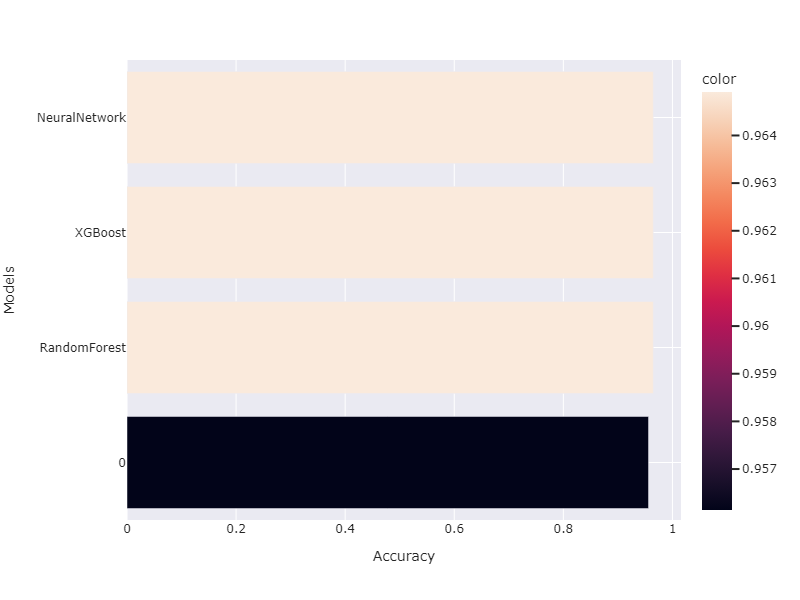

In [65]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['f1_score'].iloc[:7],
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

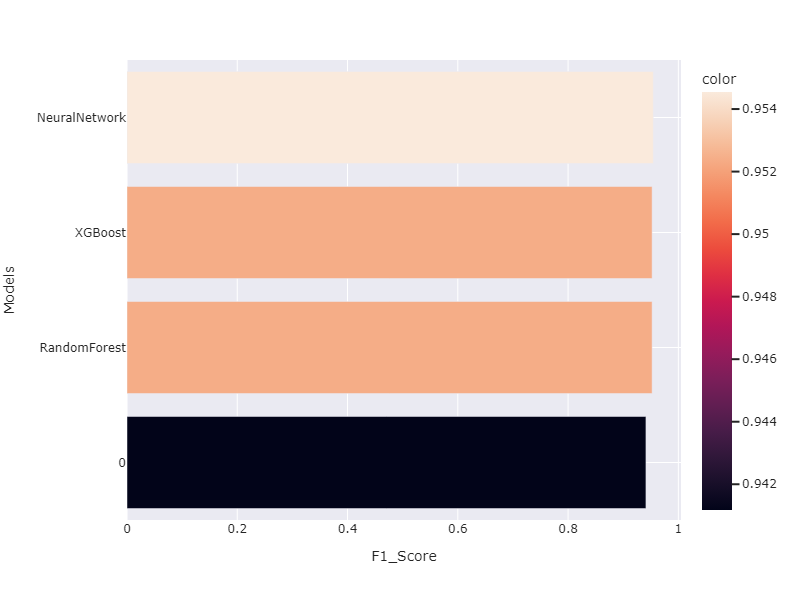

In [47]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

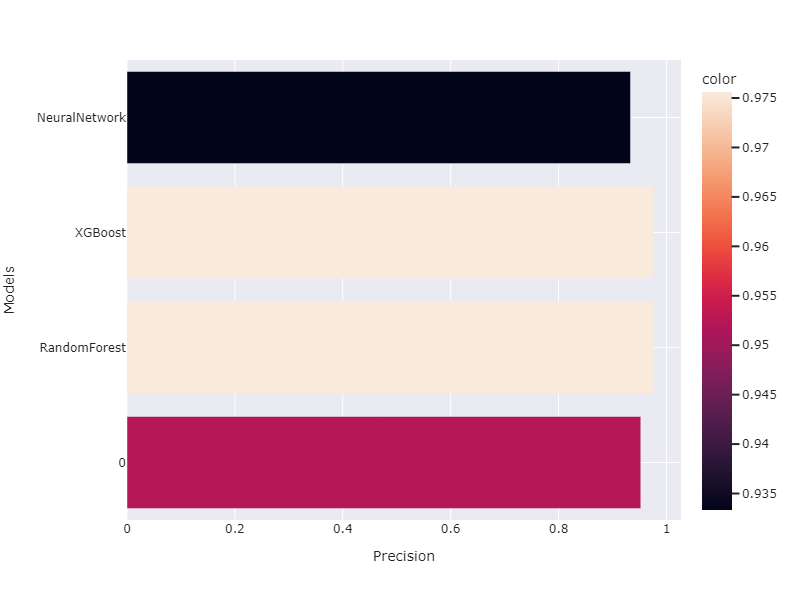

In [50]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

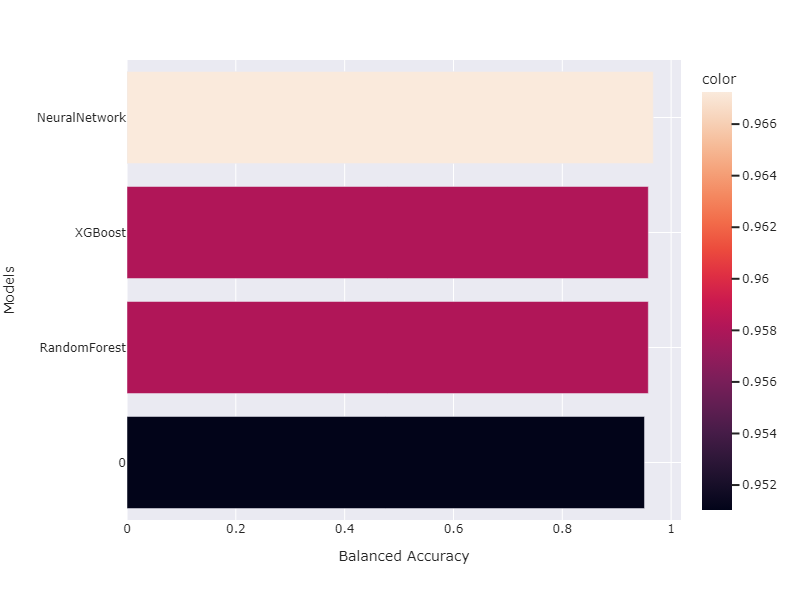